In [1]:
import scipy.signal as signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import time

## Question 1:

In [2]:
# Wave file path
wav_file = 'path_du_fichier_wave'

In [3]:
# Reading the .wav file
sigrate,sigdata = wavfile.read(wav_file)

In [4]:
# Separating the left and right channels (stereo .wav file)
right_channel_data = [x[0] for x in sigdata]
left_channel_data = [x[1] for x in sigdata]

In [5]:
# Duration
print("duration = {min}:{sec}".format(
    min=len(right_channel_data)/sigrate//60,
    sec=str((len(right_channel_data)/sigrate)%60).zfill(2)
))
print("{} sample/s".format(sigrate))

duration = 3:06
44100 sample/s


## Question 2:

### Plot du signal

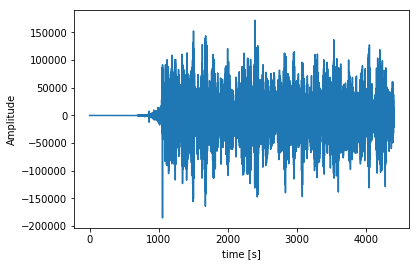

In [81]:
# Plot signal from 0 to 4410 (total duration of the plotted signal: 0.1 sec)
%matplotlib inline
plt.plot(right_channel_data[0:4410])
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.show()

### Plot de la transformée de Fourrier du signal

In [10]:
# FFT computing: (https://en.wikipedia.org/wiki/Fast_Fourier_transform)
from scipy.fftpack import fft,fftshift

In [11]:
# FFt computing
# in signal: right_channel_data 
tstart = time.time()
signal_frequencies = fft(right_channel_data)
print("execution time {} s.".format(time.time()-tstart))

execution time 10.1104209423 s.


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


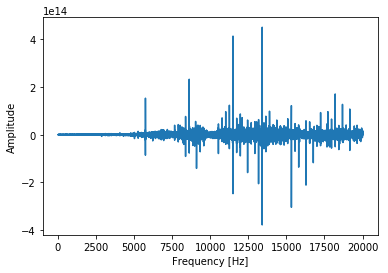

In [12]:
# Plotting the 20Hz -> 20KHz Frequencies contribution in the signal 
plt.plot(
    range(20,20000),
    signal_frequencies[20:20000]
)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

### Plot du spectrogramme du signal

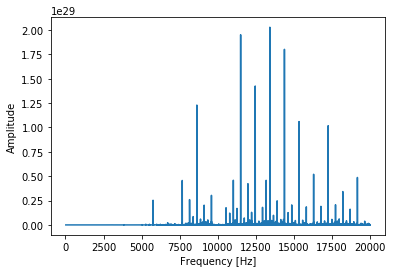

In [13]:
# Spectrogram = |fft|**2
plt.plot(
    range(20,20000),
    (np.abs(signal_frequencies)**2)[20:20000]
)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

## Question 3:

### Plot de la boxcar, du signal tronqué et de sa transformée de Fourier

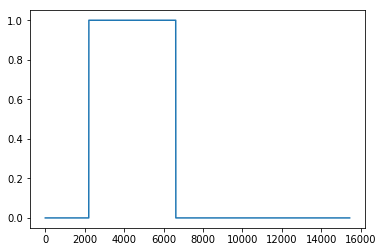

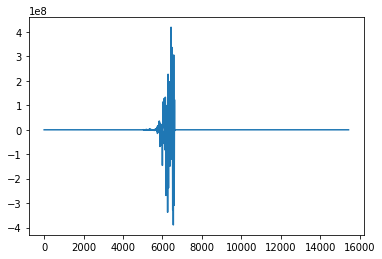

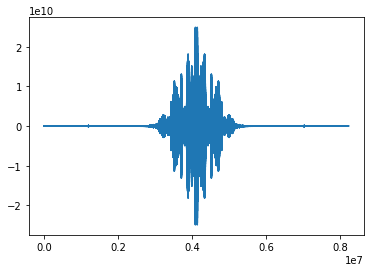

In [68]:
# boxcar window
# in signal : right_channel_data
# Borders : a = 4410, b=8820
a = 4410
b = 8820
boxcar = [0]*a+[1]*(b-a)+[0]*(len(right_channel_data)-b)
plt.plot(boxcar[a/2:b*2])
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.show()

windowed_signal = [x*y for x,y in zip(right_channel_data,boxcar)]
plt.plot(windowed_signal[a/2:b*2])
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.show()

windowed_signal_frequencies = fftshift(fft(windowed_signal))
plt.plot(windowed_signal_frequencies)
plt.xlabel('Frequence [Hz]')
plt.ylabel('Amplitude')
plt.show()

## Question 4:

### Plot de la transformée de Fourier de la boxcar et de sa convolution avec la TF du signal 

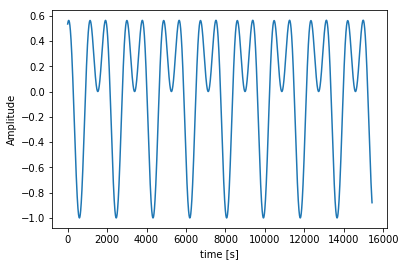

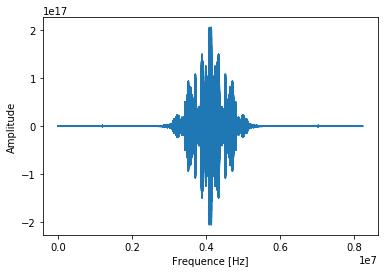

In [82]:
# fft(boxcar) & convolution
fft_boxcar = fftshift(fft(boxcar))
plt.plot(fft_boxcar[a/2:b*2])
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.show()

conv_signal = signal.convolve(fftshift(fft(right_channel_data)),fft_boxcar)
plt.plot(conv_signal[len(sinc_fft_signal)//4:-len(sinc_fft_signal)//4])
plt.xlabel('Frequence [Hz]')
plt.ylabel('Amplitude')
plt.show()


### Je vous laisse le soin de faire la conclusion suite aux dernières courbes obtenues.                 A demain.